In [55]:
import pandas as pd
import numpy as np
data = pd.read_csv("alldata.csv", sep=';')
data

,global_id,VotingName,LinkToResults,Unnamed: 3
0,284623022,Результаты голосования: Благоустройство Проспе...,ag.mos.ru/check?poll_id=1448,NaN
1,284623023,Результаты голосования: Благоустройство Ленинг...,ag.mos.ru/check?poll_id=1449,NaN
2,284623101,Результаты голосования: Экскурсии в природных ...,ag.mos.ru/check?poll_id=1459,NaN
3,284623192,Результаты голосования: Благоустройство улиц у...,ag.mos.ru/check?poll_id=1461,NaN
4,284623194,Результаты голосования: Благоустройство Неглин...,ag.mos.ru/check?poll_id=1474,NaN
...,...,...,...,...
426,1062238167,Результаты голосования: Лучший реализованный п...,ag.mos.ru/check?poll_id=7812,NaN
427,1062238177,Результаты голосования: Нужно ли менять назван...,ag.mos.ru/check?poll_id=7820,NaN
428,1062238183,Результаты голосования: Как назвать чат-бота М...,ag.mos.ru/check?poll_id=7834,NaN
429,1062238190,Результаты голосования: Проект «Музеи — детям»,ag.mos.ru/check?poll_id=7854,NaN


In [41]:
from bs4 import BeautifulSoup
import requests

In [57]:
result = data[data['VotingName'].str.contains
      ('Благоустройство|благоустройство', case = False, regex=True )== True]
result

,global_id,VotingName,LinkToResults,Unnamed: 3
0,284623022,Результаты голосования: Благоустройство Проспе...,ag.mos.ru/check?poll_id=1448,NaN
1,284623023,Результаты голосования: Благоустройство Ленинг...,ag.mos.ru/check?poll_id=1449,NaN
3,284623192,Результаты голосования: Благоустройство улиц у...,ag.mos.ru/check?poll_id=1461,NaN
4,284623194,Результаты голосования: Благоустройство Неглин...,ag.mos.ru/check?poll_id=1474,NaN
5,284623377,Результаты голосования: Главные дела Москвы: с...,ag.mos.ru/check?poll_id=1524,NaN
29,284633068,Результаты голосования: Благоустройство Бульва...,ag.mos.ru/check?poll_id=2239,NaN
108,361592732,Результаты голосования: Благоустройство усадьб...,ag.mos.ru/check?poll_id=3029,NaN
109,361638899,Результаты голосования: Благоустройство парка ...,ag.mos.ru/check?poll_id=3030,NaN
111,361735207,Результаты голосования: Благоустройство зоны о...,ag.mos.ru/check?poll_id=3039,NaN
180,832649650,Результаты голосования: Благоустройство зоны о...,ag.mos.ru/check?poll_id=3216,NaN


In [58]:
list_of_links = result["LinkToResults"].tolist()
print(list_of_links)

['ag.mos.ru/check?poll_id=1448', 'ag.mos.ru/check?poll_id=1449', 'ag.mos.ru/check?poll_id=1461', 'ag.mos.ru/check?poll_id=1474', 'ag.mos.ru/check?poll_id=1524', 'ag.mos.ru/check?poll_id=2239', 'ag.mos.ru/check?poll_id=3029', 'ag.mos.ru/check?poll_id=3030', 'ag.mos.ru/check?poll_id=3039', 'ag.mos.ru/check?poll_id=3216', 'ag.mos.ru/check?poll_id=4241', 'ag.mos.ru/check?poll_id=4010', 'ag.mos.ru/check?poll_id=3875', 'ag.mos.ru/check?poll_id=7201', 'ag.mos.ru/check?poll_id=7202', 'ag.mos.ru/check?poll_id=7203', 'ag.mos.ru/check?poll_id=7206', 'ag.mos.ru/check?poll_id=7207', 'ag.mos.ru/check?poll_id=7208']


In [ ]:
all_df = pd.DataFrame() 
links = []
for cite in list_of_links:
    id = cite.split('=')[-1]
    link = 'https://service.ag.mos.ru/static-result/' + id + '.xlsx'
    links.append(link)
for link in links:
    read_file = pd.read_excel(link)
    all_df.append(read_file, ignore_index=True)
all_df[]

In [67]:
like_results = read_file[read_file['Ответ на Вопрос 1'].str.contains
      ('Мне нравится|мне нравится', case = False, regex=True )== True]
slike = like_results.shape[0]
like_results

,№,Уникальный Идентификатор Пользователя,Дата завершения голосования,Время завершения голосования,Вопрос 1,Ответ на Вопрос 1,Вопрос 2,Ответ на Вопрос 2
0,1,9a6a4926a608d4dbef89c72bb362aa6f,2017-11-21 17:05:24.207,2017-11-21 17:05:24.207,"Вам нравится, как благоустроили парк «Левобере...","Да, мне нравится",NaN,NaN
1,2,eb6e5bdb7d380505856ab5634db720db,2017-11-21 17:05:28.997,2017-11-21 17:05:28.997,"Вам нравится, как благоустроили парк «Левобере...","Да, мне нравится",NaN,NaN
2,3,7afc4f5f0bd94c444a76b63ba672f417,2017-11-21 17:05:29.313,2017-11-21 17:05:29.313,"Вам нравится, как благоустроили парк «Левобере...","Да, мне нравится",NaN,NaN
3,4,53d601da63e6a05651bba4fd60048daf,2017-11-21 17:05:29.907,2017-11-21 17:05:29.907,"Вам нравится, как благоустроили парк «Левобере...","Да, мне нравится",NaN,NaN
4,5,7786e7141879753356ce95e82d235e26,2017-11-21 17:05:30.323,2017-11-21 17:05:30.323,"Вам нравится, как благоустроили парк «Левобере...","Да, мне нравится",NaN,NaN
...,...,...,...,...,...,...,...,...
185838,185839,c3cb63922bc997d2d27746d339e9ff00,2017-12-26 23:52:43.000,2017-12-26 23:52:43.000,"Вам нравится, как благоустроили парк «Левобере...","Да, мне нравится",NaN,NaN
185839,185840,32eb82e8048c5992c1f671f407fe5223,2017-12-26 23:52:52.677,2017-12-26 23:52:52.677,"Вам нравится, как благоустроили парк «Левобере...","Да, мне нравится",NaN,NaN
185840,185841,d80ec857ac873db58e39adcaae26a29c,2017-12-26 23:53:02.483,2017-12-26 23:53:02.483,"Вам нравится, как благоустроили парк «Левобере...","Да, мне нравится",NaN,NaN
185847,185848,f222559f513c4983a8452c489524804f,2017-12-26 23:56:14.920,2017-12-26 23:56:14.920,"Вам нравится, как благоустроили парк «Левобере...","Да, мне нравится",NaN,NaN


In [68]:
unlike_results = read_file[read_file['Ответ на Вопрос 1'].str.contains
      ('Мне не нравится|мне не нравится', case = False, regex=True )== True]
sunlike = unlike_results.shape[0]
unlike_results

,№,Уникальный Идентификатор Пользователя,Дата завершения голосования,Время завершения голосования,Вопрос 1,Ответ на Вопрос 1,Вопрос 2,Ответ на Вопрос 2
87,88,393565543b8d169d0e51a7d98b8cd70a,2017-11-21 17:06:14.950,2017-11-21 17:06:14.950,"Вам нравится, как благоустроили парк «Левобере...","Нет, мне не нравится",Что вам не понравилось в обновлённом парке и ч...,Свой вариант ответа: Все
146,147,8720ad3797b2bcf14a8f70d097e4e414,2017-11-21 17:06:50.703,2017-11-21 17:06:50.703,"Вам нравится, как благоустроили парк «Левобере...","Нет, мне не нравится",Что вам не понравилось в обновлённом парке и ч...,Свой вариант ответа: Всё
186,187,eab58e2686a30dda089a56c10b0579a3,2017-11-21 17:07:09.707,2017-11-21 17:07:09.707,"Вам нравится, как благоустроили парк «Левобере...","Нет, мне не нравится",Что вам не понравилось в обновлённом парке и ч...,"Свой вариант ответа: Все ужасно, вырублены дер..."
245,246,87e2e93e6972351d77e34e668434cd05,2017-11-21 17:07:37.067,2017-11-21 17:07:37.067,"Вам нравится, как благоустроили парк «Левобере...","Нет, мне не нравится",Что вам не понравилось в обновлённом парке и ч...,Свой вариант ответа: бессмысленное убийство жи...
279,280,a0eb61320bc4792503f411c4dff40aab,2017-11-21 17:07:50.757,2017-11-21 17:07:50.757,"Вам нравится, как благоустроили парк «Левобере...","Нет, мне не нравится",Что вам не понравилось в обновлённом парке и ч...,Свой вариант ответа: Как всегда одно и тоже Па...
...,...,...,...,...,...,...,...,...
185221,185222,387c2b053181df75ca144cbecab2b388,2017-12-26 17:38:32.320,2017-12-26 17:38:32.320,"Вам нравится, как благоустроили парк «Левобере...","Нет, мне не нравится",Что вам не понравилось в обновлённом парке и ч...,Свой вариант ответа: G
185438,185439,afd3d77f4df0eb528d69a2f9a646d6f5,2017-12-26 19:44:57.937,2017-12-26 19:44:57.937,"Вам нравится, как благоустроили парк «Левобере...","Нет, мне не нравится",Что вам не понравилось в обновлённом парке и ч...,Свой вариант ответа: все
185589,185590,a496b7c7edafdeb7dd9a452ba7e0af50,2017-12-26 21:16:36.310,2017-12-26 21:16:36.310,"Вам нравится, как благоустроили парк «Левобере...","Нет, мне не нравится",Что вам не понравилось в обновлённом парке и ч...,Свой вариант ответа: 1
185648,185649,ddc2aa817fdf41df76e8e7a0f259827e,2017-12-26 21:51:39.377,2017-12-26 21:51:39.377,"Вам нравится, как благоустроили парк «Левобере...","Нет, мне не нравится",Что вам не понравилось в обновлённом парке и ч...,Свой вариант ответа: Плитка


In [69]:
without_results = read_file[read_file['Ответ на Вопрос 1'].str.contains
      ('не был|Не был', case = False, regex=True )== True]
swlike = without_results.shape[0]
without_results

,№,Уникальный Идентификатор Пользователя,Дата завершения голосования,Время завершения голосования,Вопрос 1,Ответ на Вопрос 1,Вопрос 2,Ответ на Вопрос 2
5,6,ed780725466ab45894f8371469722fc6,2017-11-21 17:05:33.547,2017-11-21 17:05:33.547,"Вам нравится, как благоустроили парк «Левобере...","Еще не был в обновленном парке, поэтому не мог...",NaN,NaN
6,7,bd568aa97234c05b7bd0b03c8e19086b,2017-11-21 17:05:34.230,2017-11-21 17:05:34.230,"Вам нравится, как благоустроили парк «Левобере...","Еще не был в обновленном парке, поэтому не мог...",NaN,NaN
9,10,d301980261b51075b45c271d0affdfcb,2017-11-21 17:05:36.417,2017-11-21 17:05:36.417,"Вам нравится, как благоустроили парк «Левобере...","Еще не был в обновленном парке, поэтому не мог...",NaN,NaN
12,13,2cf58b1ce5c509b77e5551fe21738579,2017-11-21 17:05:37.397,2017-11-21 17:05:37.397,"Вам нравится, как благоустроили парк «Левобере...","Еще не был в обновленном парке, поэтому не мог...",NaN,NaN
15,16,232f5f33a1c07b01529b4249f45dc798,2017-11-21 17:05:39.230,2017-11-21 17:05:39.230,"Вам нравится, как благоустроили парк «Левобере...","Еще не был в обновленном парке, поэтому не мог...",NaN,NaN
...,...,...,...,...,...,...,...,...
185845,185846,bc4e0fd0fb4435b3043913170d9f8f96,2017-12-26 23:54:52.693,2017-12-26 23:54:52.693,"Вам нравится, как благоустроили парк «Левобере...","Еще не был в обновленном парке, поэтому не мог...",NaN,NaN
185846,185847,f01df60fdbf99468324f1a55346eba05,2017-12-26 23:55:08.987,2017-12-26 23:55:08.987,"Вам нравится, как благоустроили парк «Левобере...","Еще не был в обновленном парке, поэтому не мог...",NaN,NaN
185848,185849,572437ab4b75c388262b69e70023ac6c,2017-12-26 23:56:31.037,2017-12-26 23:56:31.037,"Вам нравится, как благоустроили парк «Левобере...","Еще не был в обновленном парке, поэтому не мог...",NaN,NaN
185849,185850,eddd8edeeb12bd01f12d136681eb9a93,2017-12-26 23:56:46.793,2017-12-26 23:56:46.793,"Вам нравится, как благоустроили парк «Левобере...","Еще не был в обновленном парке, поэтому не мог...",NaN,NaN


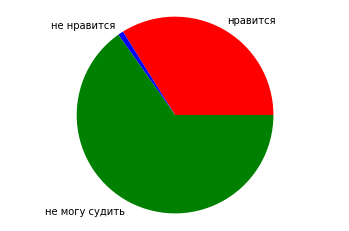

In [71]:
import matplotlib.pyplot as plt
values = [slike, sunlike, swlike]
labels = ['нравится','не нравится','не могу судить']
colors = ['red', 'blue', 'green']
plt.pie(values,labels=labels,colors=colors)
plt.axis('equal')
plt.show()

In [ ]:
read_file.groupby("")["Название театра"].nunique().sort_values(ascending=False)

In [73]:
incognito = read_file[read_file["Уникальный Идентификатор Пользователя"] == "ed780725466ab45894f8371469722fc6"]
i = incognito[incognito['Ответ на Вопрос 1'].str.contains
      ('Мне не нравится|мне не нравится', case = False, regex=True )== True]
si = i.shape[0]
i

,№,Уникальный Идентификатор Пользователя,Дата завершения голосования,Время завершения голосования,Вопрос 1,Ответ на Вопрос 1,Вопрос 2,Ответ на Вопрос 2


In [74]:
incognito.groupby("Ответ на Вопрос 1")["Ответ на Вопрос 1"].sum()

Ответ на Вопрос 1
Еще не был в обновленном парке, поэтому не могу оценить благоустройство    Еще не был в обновленном парке, поэтому не мог...
Name: Ответ на Вопрос 1, dtype: object

In [75]:
result_new = read_file[read_file['Уникальный Идентификатор Пользователя'].str.contains
      ('9a6a4926a608d4dbef89c72bb362aa6f', case = False, regex=True )== True]
result_new

,№,Уникальный Идентификатор Пользователя,Дата завершения голосования,Время завершения голосования,Вопрос 1,Ответ на Вопрос 1,Вопрос 2,Ответ на Вопрос 2
0,1,9a6a4926a608d4dbef89c72bb362aa6f,2017-11-21 17:05:24.207,2017-11-21 17:05:24.207,"Вам нравится, как благоустроили парк «Левобере...","Да, мне нравится",NaN,NaN
